# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rayhan Faiz
- **Email:** reanpies@gmail.com
- **ID Dicoding:** rayhan_faiz_mMdN

## Menentukan Pertanyaan Bisnis

- Apa produk yang paling mungkin dibeli oleh pelanggan di bulan berikutnya, berdasarkan riwayat pembelian mereka?

- Berapa kemungkinan pelanggan membatalkan pembelian mereka, berdasarkan profil dan perilaku mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

##### customers data

In [3]:
customers_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### location data

In [4]:
location_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/geolocation_dataset.csv")
location_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### orders data

In [5]:
orders_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### items data

In [6]:
items_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### reviews data

In [7]:
reviews_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### payments data

In [8]:
payments_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### product data

In [9]:
product_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### product name translation data

In [10]:
product_translate_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/product_category_name_translation.csv")
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### seller data

In [11]:
sellers_df = pd.read_csv("/content/drive/MyDrive/dataset-ecommerce/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai tabel `customer_df`

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `location_df`

In [15]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
location_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", location_df.duplicated().sum())
location_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `items_df`

In [18]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [20]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())
items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `payments_df`

In [21]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [23]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `reviews_df`

In [24]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [26]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [29]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_df`

In [30]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [148]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `product_translate_df`

In [32]:
product_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
product_translate_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [34]:
print("Jumlah duplikasi: ", product_translate_df.duplicated().sum())
product_translate_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `sellers_df`

In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `orders_df`

##### Duplicate & Missing Data

In [38]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
print("Jumlah missing value:")
print(orders_df.isna().sum())

Jumlah duplikasi:  0
Jumlah missing value:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [40]:
# konversi Dtyoe row ke-3 sampai row ke-7 menjadi Dtype datetime
datetime_columns = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [42]:
orders_df.describe(include="all")

<ipython-input-42-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-42-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-42-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-42-903538279252>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


###### Mencari missing value. Pada pesanan akan diisi berdasarkan rata-rata selisih waktu.

In [43]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [44]:
# mari cek sekiranya seperti apa row yang lengkap
orders_df.loc[orders_df['order_status'] == "delivered"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [45]:
# terlihat missing value pada kolom 'order_approved_at'
orders_df.loc[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [46]:
orders_df['time_diff'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
avg_time_diff = orders_df['time_diff'].mean()
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + avg_time_diff)
orders_df = orders_df.drop(columns=['time_diff'])

In [47]:
# sudah aman!
orders_df.loc[orders_df['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [48]:
# waduh, ada yang lain..
orders_df.loc[orders_df['order_delivered_carrier_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000000000,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05.000000000,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-09-01 02:38:52.739486910,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-07 05:10:55.739486910,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [49]:
# logika yang sama dengan kolom yang menyesuaikan kondisi
orders_df['time_diff'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
avg_time_diff = orders_df['time_diff'].mean()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + avg_time_diff)
orders_df = orders_df.drop(columns=['time_diff'])

orders_df.loc[(orders_df['order_status'] == "shipped") & (orders_df['order_delivered_carrier_date'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [50]:
orders_df['time_diff'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
avg_time_diff = orders_df['time_diff'].mean()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'] + avg_time_diff)
orders_df = orders_df.drop(columns=['time_diff'])

orders_df.loc[(orders_df['order_status'] == "delivered") & (orders_df['order_delivered_customer_date'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [51]:
# bersihin dikit desimalnya hehe
orders_df['order_approved_at'] = orders_df['order_approved_at'].dt.floor('S')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].dt.floor('S')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].dt.floor('S')

In [52]:
# brp lg ya yg masih missing... nol!
print("Jumlah missing value:")
print(orders_df.isna().sum())

Jumlah missing value:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


#### Membersihkan tabel `product_df`

##### cek duplicate data & missing value

In [53]:
print("Jumlah product duplikat: ", product_df.duplicated().sum())
print("Jumlah product yang missing")
print(product_df.isna().sum())

Jumlah product duplikat:  0
Jumlah product yang missing
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [54]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

In [55]:
# mengisi missing value berdasar category_name terbanyak
product_df['product_category_name'].fillna("cama_mesa_banho", inplace=True)

# dan mengisi missing value berdasarkan rata2 tiap kolom
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
           'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
  product_df[col].fillna(product_df[col].mean(), inplace=True)

In [56]:
print("Jumlah product yang missing")
print(product_df.isna().sum())

Jumlah product yang missing
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


#### Membersihkan tabel `reviews_df`

##### cek duplicate & missing value

In [57]:
print("Jumlah duplikat: ", reviews_df.duplicated().sum())
print("Jumlah yang missing")
reviews_df.isna().sum()

Jumlah duplikat:  0
Jumlah yang missing


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [58]:
reviews_df.groupby(by="review_comment_title").review_id.nunique().sort_values(ascending=False)

review_comment_title
Recomendo                    422
recomendo                    344
Bom                          291
super recomendo              268
Excelente                    248
                            ... 
Me mandaram outro produto      1
Mediana                        1
Mega Recomendo                 1
Mega satisfeita!               1
🔟                              1
Name: review_id, Length: 4527, dtype: int64

In [59]:
reviews_df['review_comment_title'].fillna("Recomendo", inplace=True)

In [60]:
reviews_df.groupby(by="review_comment_message").review_id.nunique().sort_values(ascending=False)

review_comment_message
Muito bom                                                                                                                                                                                                     229
Bom                                                                                                                                                                                                           188
muito bom                                                                                                                                                                                                     121
bom                                                                                                                                                                                                           106
Recomendo                                                                                                                                

In [61]:
reviews_df['review_comment_message'].fillna("Muito bom", inplace=True)

In [62]:
print("Jumlah yang missing =")
reviews_df.isna().sum()

Jumlah yang missing =


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `customer_df`

In [63]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30684,7a4beb2915cebb15e4404c1d764ff1ff,5cf4d8521b41d12abb8835cd05cefe1e,66085,belem,PA
87014,3ce5345931105e4e5e8710d5ad3739e4,7fb6db76737f019f045f48f7b9c9d3c0,12710,cruzeiro,SP
92638,1eef2bcc23c75349976a65957e2e105b,f41d536fced5c1203d8a07ef09cf823c,4741,sao paulo,SP
46006,7c5476d2a29e6ebe176657d093dd8b18,962b00bd9512a48b7e8e0df4cff12d65,13720,sao jose do rio pardo,SP
22246,98429ab5c5f97e1d0d1651b16780769e,5dc8098e89f6852b2ab99d7b3123c27b,9895,sao bernardo do campo,SP


In [64]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [65]:
customers_df.customer_id.is_unique

True

In [66]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [67]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `orders_df`

In [68]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68324,48fcb88788cb3df0296a5dcf8f95ac68,fffb97495f78be80e2759335275df2aa,delivered,2018-01-16 14:51:35,2018-01-16 15:09:51,2018-01-17 18:18:41,2018-01-26 20:16:41,2018-02-06
95492,eaa862b99d06a963cff6699021d83f09,1a187e61bc83d03ff6e887048de8b269,delivered,2018-06-22 00:17:50,2018-06-22 00:38:36,2018-06-22 13:26:00,2018-06-27 12:07:50,2018-07-05
53201,96eb3b1e9be34336c89369e6efa182f5,efb6de351a6330ac5f2b85b9b4004e8f,delivered,2018-01-16 12:35:44,2018-01-18 02:13:17,2018-01-19 20:48:34,2018-02-09 17:04:07,2018-02-21
92873,4b594c50ed0279e3677e9580c4cfcfdb,abf1d44efff91a2a2d28d86a1f2d773c,delivered,2017-06-26 14:24:05,2017-06-28 00:34:02,2017-07-04 14:51:46,2017-07-10 19:15:31,2017-07-27
85322,6e913f64d31f551cbbc72e703744e52f,1fbc6ac732dc145df4be72bd4d75ca04,delivered,2018-05-06 14:24:39,2018-05-06 14:35:10,2018-05-11 12:25:00,2018-05-21 13:08:33,2018-05-18


In [69]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["order_delivery_time"] = round(delivery_time/86400) # delivery time berapa hari

In [70]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
67798,2def71c3b4ee133da4476d4d0ca8baa0,874dc4a508727925e855857a24f95ee5,delivered,2017-11-15 11:45:03,2017-11-15 11:56:03,2017-11-16 15:18:50,2017-11-28 20:04:57,2017-12-08,12.0
29341,76464635ac7911e6670c028e667ca7f0,a94e78deb3579cab87a6df262fb7620c,shipped,2018-08-08 12:07:33,2018-08-08 12:15:19,2018-08-09 14:22:00,2018-08-18 22:18:35,2018-08-23,9.0
58467,b65df09993493fd5f15bef98f1a348fc,684313a21b6b8e984f57771f36d7e03b,delivered,2018-08-15 11:02:31,2018-08-15 11:15:20,2018-08-16 13:11:00,2018-08-20 21:56:29,2018-09-18,4.0
56705,ed6b29fe01737a1e042a05988daf31db,0d1f1e7ff1445f97f5cef1e3c059e7ce,delivered,2017-12-21 18:53:44,2017-12-21 19:09:59,2017-12-22 15:04:22,2018-01-06 16:51:58,2018-01-22,15.0
91394,119f1430154997cf2ea4e905667408d1,326bd99b43665ac9e198d45b189740b5,delivered,2018-05-29 02:29:23,2018-05-29 02:51:18,2018-05-29 14:04:00,2018-06-06 20:04:33,2018-07-04,8.0


In [71]:
orders_df.describe(include="all")

<ipython-input-71-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-71-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-71-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-71-903538279252>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,98875,90893,82794,98617,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:46:13,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-18 03:55:26,2018-10-20 23:15:00,2018-10-30 07:11:36,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.284008
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.645896
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [72]:
# sepertinya terbalik, mari ditukar
orders_df[orders_df.order_delivery_time == orders_df.order_delivery_time.min()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
34939,c1e2bf2b7dd3309f2f5356c6b63968fa,e37d47e7eec62f08dc5deecc7d5532d6,delivered,2017-02-10 10:19:10,2017-02-10 10:30:13,2017-03-02 17:34:26,2017-02-14 15:15:57,2017-03-15,-16.0


In [73]:
swap_rows = orders_df["order_delivered_customer_date"] < orders_df["order_delivered_carrier_date"]

orders_df["temp_carrier_date"] = orders_df["order_delivered_carrier_date"]

orders_df.loc[swap_rows, "order_delivered_carrier_date"] = orders_df.loc[swap_rows, "order_delivered_customer_date"]
orders_df.loc[swap_rows, "order_delivered_customer_date"] = orders_df["temp_carrier_date"]

orders_df.drop(columns=["temp_carrier_date"], inplace=True)

In [74]:
# operasikan delivery time kembali, lalu cek apa sudah sesuai

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["order_delivery_time"] = round(delivery_time/86400) # delivery time berapa hari

orders_df[orders_df.order_delivery_time == orders_df.order_delivery_time.min()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
1012,da3c95552f6afd61ddc95ce17dc71606,9625c9b960cb2a2645738ad08d8fd709,delivered,2018-03-20 14:27:23,2018-03-20 14:49:27,2018-03-27 04:28:46,2018-03-27 13:21:08,2018-04-02,0.0
2145,34b04c30d0f21489e3871bb9083582f6,24bffa8e3281713f3aeb4eb619bf0002,delivered,2017-06-14 20:22:18,2017-06-14 20:36:11,2017-06-19 08:12:09,2017-06-19 19:36:03,2017-06-29,0.0
3546,354ca44327bb555017ef42fd921ada11,606ac72d2b2b2a89114d972d2e66a2a4,delivered,2017-01-30 16:33:23,2017-01-30 17:34:46,2017-01-31 08:59:38,2017-01-31 19:13:10,2017-03-15,0.0
3577,8ea705b6d457f1b50272b5ae5a7a9099,6e99b4a37b2d5aa40cb85bdfcf9dc0eb,delivered,2017-06-14 12:52:00,2017-06-14 13:05:08,2017-06-19 08:12:07,2017-06-19 19:35:51,2017-06-30,0.0
3706,3324048ac2f2df01f583f71758589776,358be33e0da76b214b9504d0ca78c556,delivered,2017-07-23 21:24:59,2017-07-25 03:30:18,2017-08-09 18:18:28,2017-08-09 18:18:28,2017-08-15,0.0
...,...,...,...,...,...,...,...,...,...
95734,c38123fe01a5d1757b545ecfccb89c0d,f9a537570825b53bb35d231a69fda6c8,delivered,2017-11-13 23:11:16,2017-11-13 23:30:49,2017-11-23 14:34:40,2017-11-23 20:35:51,2017-11-27,0.0
97428,8339b608be0d84fca9d8da68b58332c3,ff58662c328f81d3ee549c9caa942f39,delivered,2018-06-26 20:48:33,2018-06-26 21:07:25,2018-06-27 11:31:00,2018-06-27 17:31:53,2018-07-25,0.0
97891,d3a84031db6c5de813d5a3a3489712ca,a5bda6def3f77258ca2027b7d4a384e9,delivered,2016-10-09 23:25:13,2016-10-10 11:03:08,2016-10-14 11:03:10,2016-10-14 11:03:10,2016-11-30,0.0
98391,576adb3745bf32808dc8207fe39f8542,f6ec8e3d19c8c405c7839b0389c5bb7b,delivered,2017-06-17 09:36:39,2017-06-17 09:50:17,2017-06-19 17:04:29,2017-06-19 20:54:39,2017-06-30,0.0


<Axes: >

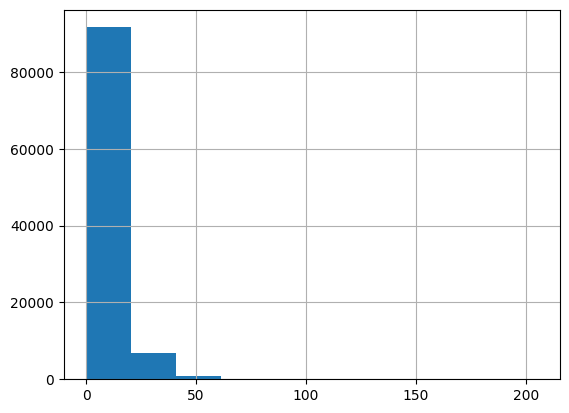

In [75]:
orders_df.order_delivery_time.hist()

### Penggabungan `customer_df` dan `orders_df`

In [76]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [77]:
orders_customers_df.groupby(by="order_status").customer_unique_id.nunique().sort_values(ascending=False)

order_status
delivered      93358
shipped         1100
canceled         616
unavailable      604
invoiced         314
processing       301
created            5
approved           2
Name: customer_unique_id, dtype: int64

In [78]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [79]:
orders_customers_df[orders_customers_df['order_status'] == 'canceled'][['order_id']]

,order_id
397,1b9ecfe83cdc259250e1a8aca174f0ad
613,714fb133a6730ab81fa1d3c1b2007291
1058,3a129877493c8189c59c60eb71d97c29
1130,00b1cb0320190ca0daa2c88b35206009
1801,ed3efbd3a87bea76c2812c66a0b32219
...,...
98791,b159d0ce7cd881052da94fa165617b05
98909,e49e7ce1471b4693482d40c2bd3ad196
99143,6560fb10610771449cb0463c5ba12199
99283,3a3cddda5a7c27851bd96c3313412840


### Explore `product_gf`

In [80]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32166,bcdfe7d7d9e6f6eb14f6947b0e92537b,beleza_saude,59.000000,738.000000,6.000000,400.0,16.0,16.0,16.0
589,8bfd18c7b7358231b2a3f9ae98eed105,ferramentas_jardim,57.000000,365.000000,6.000000,850.0,24.0,13.0,18.0
31030,77b8df1769ca65b7d8beb835ba31d297,automotivo,58.000000,569.000000,6.000000,1500.0,50.0,5.0,50.0
27807,0a48b93d24c0c87253c73da8cb8c2e80,beleza_saude,36.000000,337.000000,1.000000,514.0,17.0,16.0,13.0
17494,3ddc79cbdf7e79ea75449765656c3b3e,cama_mesa_banho,49.000000,359.000000,1.000000,1250.0,45.0,10.0,15.0
21387,bdb71a735c94e9c7779d5d2084d91698,cama_mesa_banho,44.000000,232.000000,1.000000,1450.0,38.0,7.0,31.0
4155,037a23831f142c505b119215d92eaf7e,moveis_escritorio,62.000000,1139.000000,1.000000,8900.0,53.0,50.0,16.0
19620,b29fcbd778387a0218e2f058e57bce75,cama_mesa_banho,48.476949,771.495285,2.188986,8750.0,36.0,27.0,54.0
16879,ccb3df28522945422e24b108603a1d04,automotivo,46.000000,708.000000,1.000000,567.0,19.0,14.0,15.0
20324,25e3dbdd14cfd1a5b4638f0a9d41e70f,cama_mesa_banho,53.000000,337.000000,3.000000,1850.0,45.0,15.0,35.0


In [81]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [82]:
product_df.sort_values(by="product_weight_g", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0
2417,343c15a347e523f2b6cf38a5db81e179,esporte_lazer,48.0,1232.0,2.0,30000.0,105.0,65.0,20.0
4814,0984eaa8480e41aded35bd7b5131a1c1,beleza_saude,58.0,540.0,1.0,30000.0,55.0,75.0,61.0
15982,c100e5fef1abb5e1c5054d1dac2d83ac,beleza_saude,57.0,534.0,1.0,30000.0,55.0,75.0,61.0
23581,a8baceb529f7e2a5c770cc5b4e3da35d,beleza_saude,55.0,432.0,1.0,30000.0,55.0,75.0,61.0
...,...,...,...,...,...,...,...,...,...
16181,5837bba0ce6e35e6f2dc5c3e223e3276,moveis_decoracao,52.0,1041.0,2.0,2.0,11.0,11.0,52.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0


In [83]:
product_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "product_photos_qty": "sum",
    "product_length_cm":  ["min", "max"],
    "product_height_cm":  ["min", "max"],
    "product_width_cm":  ["min", "max"]
})

product_id product_photos_qty product_length_cm  \
                             nunique                sum               min   
product_category_name                                                       
agro_industria_e_comercio         74              171.0              11.0   
alimentos                         82              159.0              16.0   
alimentos_bebidas                104              197.0              16.0   
artes                             55              119.0              16.0   
artes_e_artesanato                19               57.0              16.0   
...                              ...                ...               ...   
sinalizacao_e_seguranca           93              231.0              16.0   
tablets_impressao_imagem           9               27.0              16.0   
telefonia                       1134             3129.0              12.0   
telefonia_fixa                   116              347.0              14.0   
utilidades_domesticas           2335             5167.0              10.0   

                                 product_height_cm        product_width_cm  \
                             max               min    max              min   
product_category_name                                                        
agro_industria_e_comercio   99.0               2.0  105.0             10.0   
alimentos                   44.0               4.0   52.0             11.0   
alimentos_bebidas           57.0               2.0   40.0             11.0   
artes                      100.0               2.0   62.0             11.0   
artes_e_artesanato         105.0               2.0   25.0             11.0   
...                          ...               ...    ...              ...   
sinalizacao_e_seguranca    100.0               2.0  105.0             11.0   
tablets_impressao_imagem    60.0               3.0   27.0             11.0   
telefonia                   40.0               2.0   51.0              8.0   
telefonia_fixa             100.0               2.0   30.0              9.0   
utilidades_domesticas      105.0               2.0  105.0             11.0   

                                 
                            max  
product_category_name            
agro_industria_e_comercio  80.0  
alimentos                  36.0  
alimentos_bebidas          30.0  
artes                      70.0  
artes_e_artesanato         65.0  
...                         ...  
sinalizacao_e_seguranca    53.0  
tablets_impressao_imagem   40.0  
telefonia                  30.0  
telefonia_fixa             33.0  
utilidades_domesticas      90.0  

[73 rows x 8 columns]

### Penggabungan `items_df` dan `product_df`

In [84]:
items_product_df = pd.merge(
    left=items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [85]:
items_product_df.groupby(by="order_item_id").price.mean()

order_item_id
1     125.964327
2      85.456052
3      78.004534
4      77.243161
5      75.561978
6      76.165508
7     100.711897
8     120.766944
9      80.356071
10     81.569200
11     60.147059
12     51.059231
13     54.421250
14     57.911429
15     63.278000
16     66.633333
17     66.633333
18     66.633333
19     66.633333
20     66.633333
21      7.800000
Name: price, dtype: float64

In [86]:
items_product_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "freight_value": "mean",
    "price": "mean",
    "product_weight_g": "first"
}).sort_values(by="product_weight_g", ascending=False)

,order_id,freight_value,price,product_weight_g
product_category_name,,,,
pet_shop,1710,20.319076,110.074684,30000.0
portateis_casa_forno_e_cafe,75,36.156053,624.285658,16550.0
pcs,181,48.454680,1098.340542,13700.0
moveis_quarto,95,42.497523,183.750275,13450.0
casa_conforto,397,19.588088,134.958618,10050.0
...,...,...,...,...
eletronicos,2550,16.833509,57.913531,150.0
alimentos,450,14.256922,57.634137,150.0
fashion_roupa_infanto_juvenil,8,11.938750,71.231250,120.0


In [87]:
items_product_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "freight_value": "mean",
    "price": "mean"
})

,order_id,freight_value,price
product_category_name,,,
agro_industria_e_comercio,182,27.564151,342.124858
alimentos,450,14.256922,57.634137
alimentos_bebidas,227,16.215791,54.602446
artes,202,19.354880,115.802105
artes_e_artesanato,23,15.422083,75.583750
...,...,...,...
sinalizacao_e_seguranca,140,32.702613,108.086583
tablets_impressao_imagem,79,14.773494,90.703735
telefonia,4199,15.669041,71.213978


### Explore `sellers_df`

In [88]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
664,bfd27a966d91cfaafdb25d076585f0da,13930,serra negra,SP
2057,f7ccf836d21b2fb1de37564105216cc1,14940,ibitinga,SP
608,ef30892870c278497523264be1be2241,14801,araraquara,SP
1214,a2a41aedb70551d4a85aa04dc2fced48,4447,sao paulo,SP
1527,7681ef142fd2c19048da7430856b5588,7074,guarulhos,SP


In [89]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [90]:
sellers_df.groupby(by="seller_zip_code_prefix").seller_id.nunique().sort_values(ascending=False)

seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
         ..
9411      1
9405      1
9400      1
9340      1
99730     1
Name: seller_id, Length: 2246, dtype: int64

In [91]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Penggabungan `sellers_df` dan `items_df`

In [92]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [93]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [94]:
items_sellers_df = pd.merge(
    left=items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


### Explore `reviews_df`

In [95]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
85237,8b8890cdfb407b0698062ee1f8a2bd9f,8d4bf0250a288cb514e50be83d8d6cd1,5,Recomendo,Chegou como esperado,2017-11-28 00:00:00,2017-11-29 09:41:03
40431,01d08cbdbce127b0a4ed6c60e1ee6ee1,6727a4e9eed7135cefc6d0f9de7f88a3,5,Recomendo,"Recebi dentro do prazo estabelecido, adorei os...",2018-08-02 00:00:00,2018-08-04 09:40:05
71928,d0fe8e256324c69e7edab0b53191a127,4436e626db9585e2b35ab07c45ddaf2f,5,Recomendo,Muito bom,2017-12-21 00:00:00,2017-12-21 18:14:12
83106,da53084317a83260448212dcd52b2e0f,4983af2477ae85a49af5ab63a208c507,5,super recomendo,otima,2018-04-13 00:00:00,2018-05-02 11:36:42
72599,eaaa41bee6848e426757573b8a2b9b5e,7c67a9f94c58c5b1c1a40953151fbccd,5,Ótimo,Muito bom o produto,2018-08-31 00:00:00,2018-08-31 16:48:59


In [96]:
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58477,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


### Penggabungan `reviews_df` & `orders_customers_df` menjadi `customer_review_df`

In [97]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Muito bom,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Muito bom,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Muito bom,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [98]:
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [99]:
customer_review_df = pd.merge(
    left=orders_customers_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customer_review_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Muito bom,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,Recomendo,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,Recomendo,Muito bom,2018-02-17 00:00:00,2018-02-18 13:02:51


### Menggabungkan semua data

#### barudak kandidat pergabungan

In [100]:
customer_review_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Muito bom,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,Recomendo,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,Recomendo,Muito bom,2018-02-17 00:00:00,2018-02-18 13:02:51


In [101]:
items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [102]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### gabungin item product & seller

In [103]:
# @title translate dulu wkwkw
items_product_df = pd.merge(
    left= items_product_df,
    right= product_translate_df,
    how= "left",
    left_on="product_category_name",
    right_on="product_category_name"
)

items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [104]:
items_product_df["product_category_name"] = items_product_df.apply(
    lambda row: row["product_category_name_english"] if pd.notnull(row["product_category_name_english"]) else row['product_category_name'],
    axis=1
)

items_product_df.drop(columns=['product_category_name_english'], inplace=True)

items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [105]:
sale_df = pd.merge(
    left= items_product_df,
    right= sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sale_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


#### merge all

In [106]:
all_df = pd.merge(
    left=customer_review_df,
    right=sale_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


##### download hasil all_df

In [107]:
# all_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Percobaan penerapan geoanalisis

#### Geoanalisis pesanan terbanyak berdasarkan city (kota)

<ipython-input-158-3a1be366b442>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=order_count_by_city.head(10).index, x=order_count_by_city.head(10).values, palette=colors_)


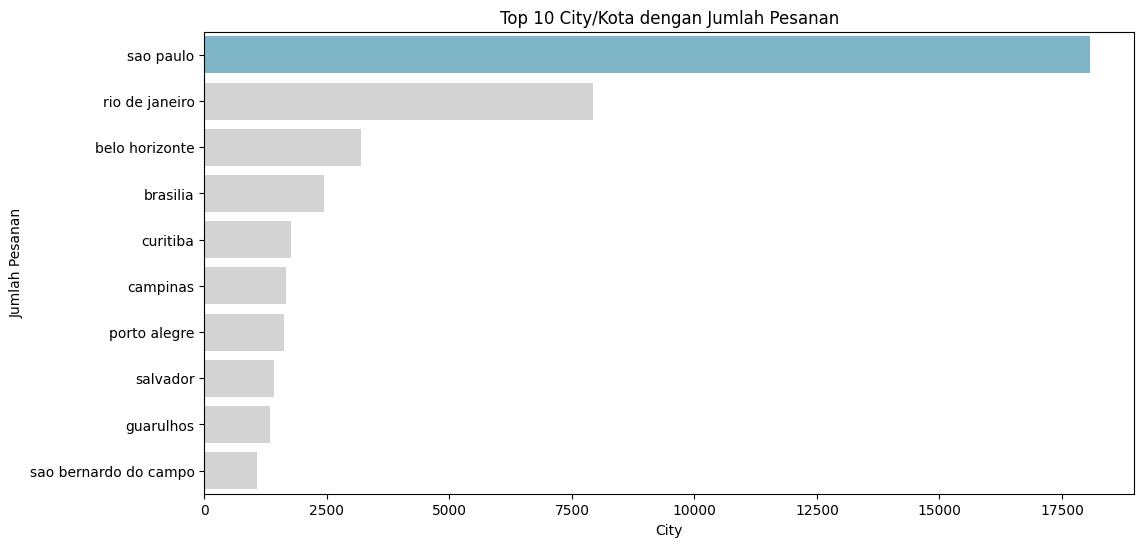

In [158]:
geo_data = all_df[['customer_city', 'order_id']]
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

order_count_by_city = geo_data['customer_city'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=order_count_by_city.head(10).index, x=order_count_by_city.head(10).values, palette=colors_)
plt.title('Top 10 City/Kota dengan Jumlah Pesanan')
plt.xlabel('City')
plt.ylabel('Jumlah Pesanan')
plt.show()

#### Geoanalisis pesanan terbanyak berdasarkan state (provinsi jika Indonesia)

<ipython-input-159-9b68ca5512a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=order_count_by_state.head(10).index, x=order_count_by_state.head(10).values, palette=colors_)


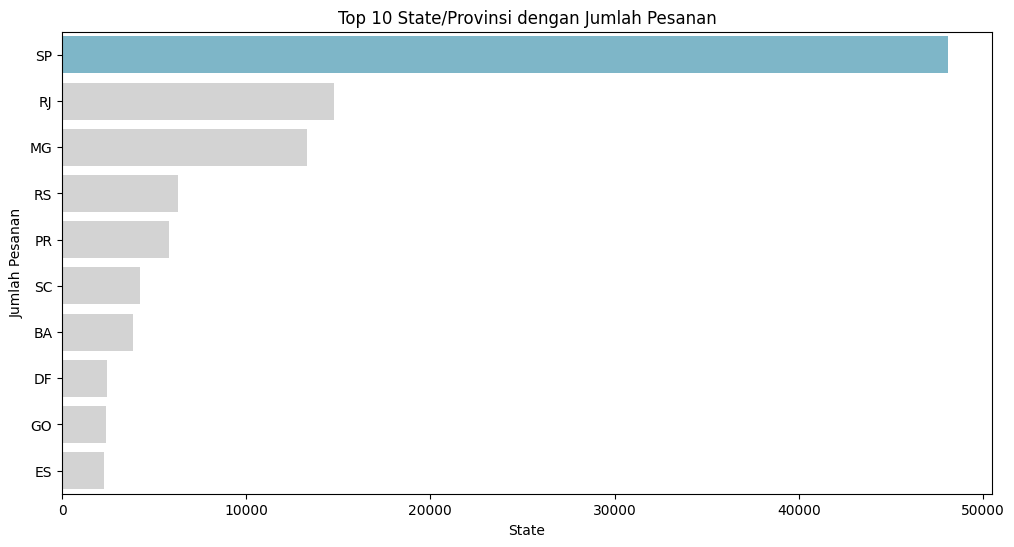

In [159]:
geo_data = all_df[['customer_state', 'order_id']]
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

order_count_by_state = geo_data['customer_state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=order_count_by_state.head(10).index, x=order_count_by_state.head(10).values, palette=colors_)
plt.title('Top 10 State/Provinsi dengan Jumlah Pesanan')
plt.xlabel('State')
plt.ylabel('Jumlah Pesanan')
plt.show()

### Pertanyaan 1: Apa produk yang paling mungkin dibeli oleh pelanggan di bulan berikutnya, berdasarkan riwayat pembelian?

In [108]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,customer_unique_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP


In [109]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [131]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum",
    "product_category_name": lambda x: x.mode().iat[0] if not x.mode().empty else None
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "waktu_pesanan",
    "order_id": "jumlah_pesanan",
    "price": "penghasilan",
    "product_category_name": "produk_terlaris"
}, inplace=True)

monthly_orders_df.head()

,waktu_pesanan,jumlah_pesanan,penghasilan,produk_terlaris
0,September,4,267.36,health_beauty
1,October,324,49634.35,furniture_decor
2,November,0,0.00,None
3,December,1,10.90,fashion_bags_accessories
4,January,800,121087.90,furniture_decor


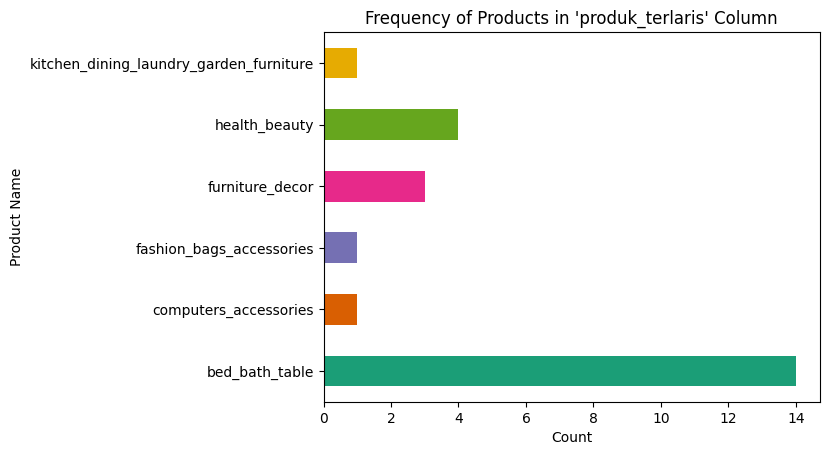

In [150]:
# @title Jumlah produk dengan stock terbanyak pada kolom produk_terlaris

monthly_orders_df.groupby('produk_terlaris').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.title("Jumlah Produk di kolom 'produk_terlaris'")
plt.xlabel("Count")
plt.ylabel("Product Name")

plt.show()

### Pertanyaan 2: Berapa kemungkinan pelanggan membatalkan pembelian mereka, berdasarkan profil dan perilaku mereka?

In [134]:
canceled_orders_df = all_df[all_df['order_status'] == 'canceled']

canceled_products_count = canceled_orders_df['product_category_name'].value_counts()

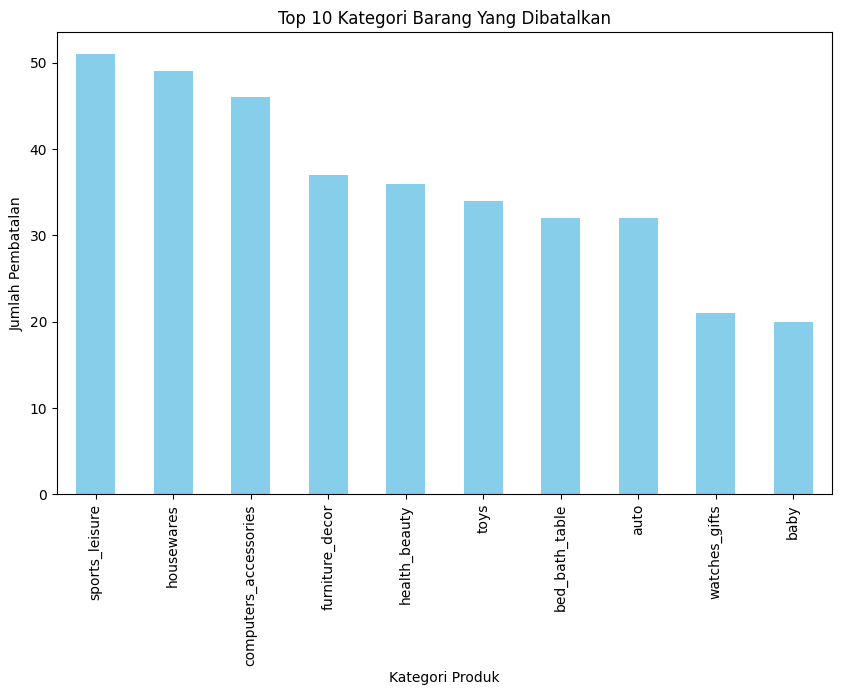

In [136]:
# @title Produk yang paling sering dibatalkan

plt.figure(figsize=(10, 6))
canceled_products_count.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Kategori Barang Yang Dibatalkan')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembatalan')
plt.show()

In [143]:
review_cancel_prob = all_df.groupby('review_score')['order_status'].apply(lambda x: (x == 'canceled').mean())

delivery_time_cancel_prob = all_df.groupby(pd.cut(all_df['order_delivery_time'], bins=[0, 24, 48, 72, float('inf')]))['order_status'].apply(lambda x: (x == 'canceled').mean())

purchase_history_cancel_prob = all_df.groupby('customer_unique_id')['order_status'].apply(lambda x: (x == 'canceled').mean())

top_categories = all_df['product_category_name'].value_counts().head(10).index
category_cancel_prob = all_df[all_df['product_category_name'].isin(top_categories)].groupby('product_category_name')['order_status'].apply(lambda x: (x == 'canceled').mean())

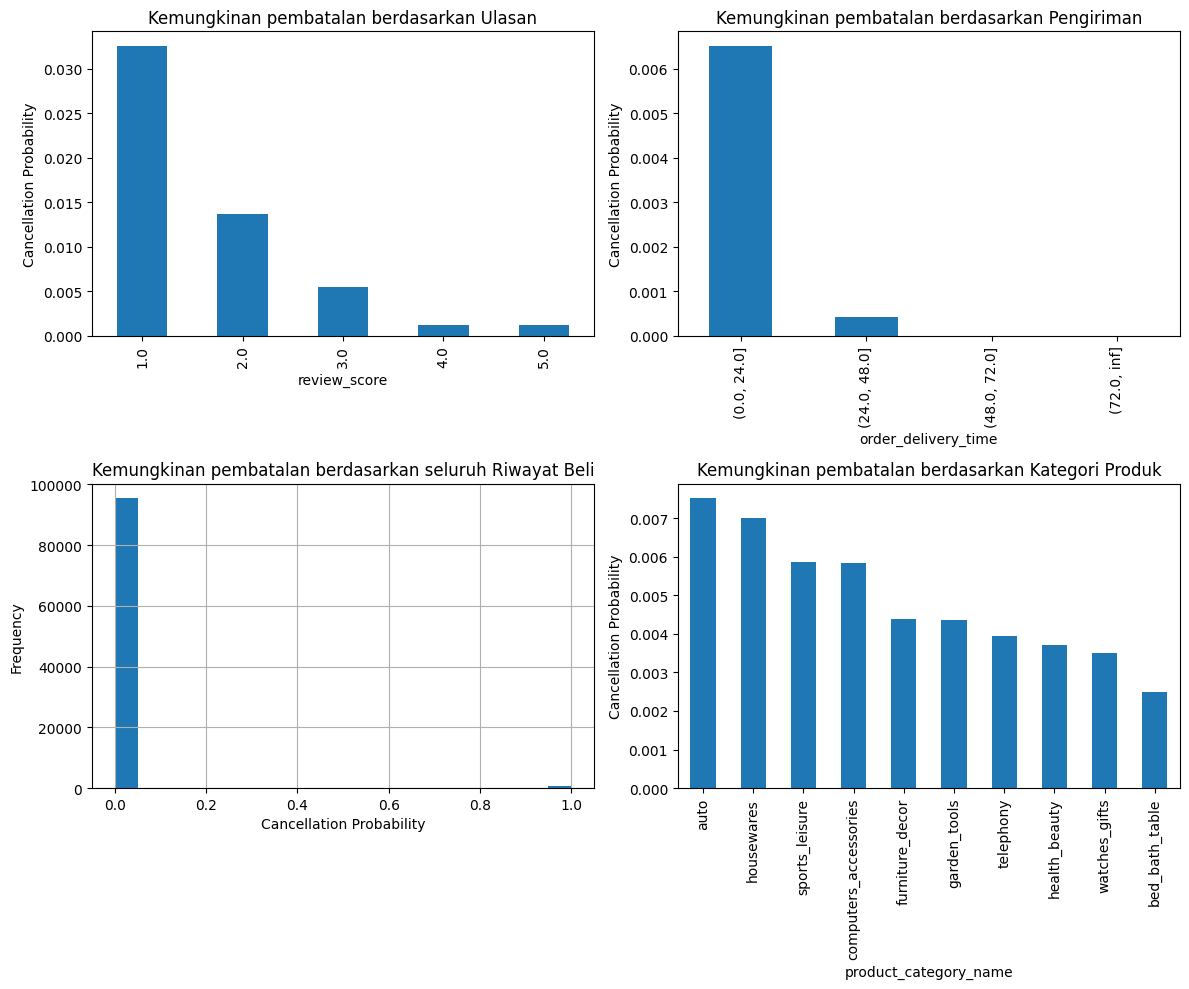

In [147]:
# @title Probabilitas penyebab pembatalan berdasarkan data

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

review_cancel_prob.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Kemungkinan pembatalan berdasarkan Ulasan')
axes[0, 0].set_ylabel('Cancellation Probability')

delivery_time_cancel_prob.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Kemungkinan pembatalan berdasarkan Pengiriman')
axes[0, 1].set_ylabel('Cancellation Probability')

purchase_history_cancel_prob.hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Kemungkinan pembatalan berdasarkan seluruh Riwayat Beli')
axes[1, 0].set_xlabel('Cancellation Probability')
axes[1, 0].set_ylabel('Frequency')

category_cancel_prob.sort_values(ascending=False).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Kemungkinan pembatalan berdasarkan Kategori Produk')
axes[1, 1].set_ylabel('Cancellation Probability')

plt.tight_layout()
plt.show()

## Conclusion

### Conclution pertanyaan 1.
> "***Apa produk yang paling mungkin dibeli oleh pelanggan di bulan berikutnya, berdasarkan riwayat pembelian?***"
>
> berdasarkan data yang tertampilkan pada monthly_orders_df, barang-barang furnitur menjadi yang terlaris sebanyak 2x yaitu saat bulan Oktober dan bulan Januari.
>
> Namun, data stock menunjukan bed_bath_table merupakan produk dengan jumlah terbanyak.
>
> Masukan:
- Mungkin produksi stock pada bed_bath_table bisa dikurangkan dan memfokuskan produksi stock pada furniture_decor.

### Conclution pertanyaan 2
> "***Berapa kemungkinan pelanggan membatalkan pembelian mereka, berdasarkan profil dan perilaku mereka?***"
>
> Berdasarkan data yang tertampilkan pada canceled_products_count sports_leisure menjadi product yang paling sering dibatalkan pembeliannya.
>
> Tetapi sports_leisure menempati peringkat ke-3 untuk kemungkinan dibatalkannya pesanan menurut chart category_cancel_prob
>
> Kemungkinan pesanan dibatalkan diantaranya:
- karena memiliki ulasan bintang 1.
- karena rentang pengiriman yang seharusnya cepat malah memakan waktu hingga 10+ sampai 20+ hari.
>
> meskipun demikian, berdasarkan seluruh riwayat, pesanan hampir tidak pernah dibatalkan kecuali terdapat faktor-faktor yang menyebabkan dibatalkannya pesanan tersebut.